# Importing data from a CKAN-powered data portal

In [31]:
import ckanapi
from pprint import pprint

site = "https://data.wprdc.org"

Define a function to get data from any CKAN resource stored in the CKAN Datastore (an internal database for tabular data).

In [32]:
def get_resource_data(site,resource_id,count=50):
    # Use the datastore_search API endpoint to get <count> records from
    # a CKAN resource.
    ckan = ckanapi.RemoteCKAN(site)
    response = ckan.action.datastore_search(id=resource_id, limit=count)

    # A typical response is a dictionary like this
    #{u'_links': {u'next': u'/api/action/datastore_search?offset=3',
    #             u'start': u'/api/action/datastore_search'},
    # u'fields': [{u'id': u'_id', u'type': u'int4'},
    #             {u'id': u'pin', u'type': u'text'},
    #             {u'id': u'number', u'type': u'int4'},
    #             {u'id': u'total_amount', u'type': u'float8'}],
    # u'limit': 3,
    # u'records': [{u'_id': 1,
    #               u'number': 11,
    #               u'pin': u'0001B00010000000',
    #               u'total_amount': 13585.47},
    #              {u'_id': 2,
    #               u'number': 2,
    #               u'pin': u'0001C00058000000',
    #               u'total_amount': 7827.64},
    #              {u'_id': 3,
    #               u'number': 1,
    #               u'pin': u'0001C01661006700',
    #               u'total_amount': 3233.59}],
    # u'resource_id': u'd1e80180-5b2e-4dab-8ec3-be621628649e',
    # u'total': 88232}
    data = response['records']
    return data

Get data from the resource with ID "bf8b3c7e-8d60-40df-9134-21606a451c1a" (this is taken from the end of the URL for the 2017 Allegeheny County Crash Data [https://data.wprdc.org/dataset/allegheny-county-crash-data/resource/bf8b3c7e-8d60-40df-9134-21606a451c1a]). Set the row count to get to 999999999, a much larger number than the number of rows in the 2017 crash data.

In [33]:
crash_data_2017 = get_resource_data(site,resource_id="bf8b3c7e-8d60-40df-9134-21606a451c1a",count=999999999) 

How may rows did we get?

In [34]:
len(crash_data_2017)

12537

Good. We got all of them. What does a sample row look like?

In [35]:
pprint(crash_data_2017[2])

{'ACCESS_CTRL': None,
 'ADJ_RDWY_SEQ': None,
 'AGGRESSIVE_DRIVING': 0,
 'ALCOHOL_RELATED': 0,
 'AUTOMOBILE_COUNT': 1,
 'BELTED_DEATH_COUNT': 0,
 'BELTED_MAJ_INJ_COUNT': 0,
 'BICYCLE': 0,
 'BICYCLE_COUNT': 0,
 'BICYCLE_DEATH_COUNT': 0,
 'BICYCLE_MAJ_INJ_COUNT': 0,
 'BUS_COUNT': 0,
 'CELL_PHONE': 0,
 'COLLISION_TYPE': '7',
 'COMM_VEHICLE': 0,
 'COMM_VEH_COUNT': 0,
 'CONS_ZONE_SPD_LIM': None,
 'CRASH_COUNTY': '2',
 'CRASH_CRN': '2017000026',
 'CRASH_MONTH': '1',
 'CRASH_YEAR': 2017,
 'CROSS_MEDIAN': 0,
 'CURVED_ROAD': 0,
 'CURVE_DVR_ERROR': 0,
 'DAY_OF_WEEK': 1,
 'DEC_LAT': 40.4485,
 'DEC_LONG': -80.0128,
 'DEER_RELATED': 0,
 'DISTRACTED': 1,
 'DISTRICT': '11',
 'DRINKING_DRIVER': 0,
 'DRIVER_16YR': 0,
 'DRIVER_17YR': 0,
 'DRIVER_18YR': 0,
 'DRIVER_19YR': 0,
 'DRIVER_20YR': 0,
 'DRIVER_50_64YR': 0,
 'DRIVER_65_74YR': 0,
 'DRIVER_75PLUS': 0,
 'DRIVER_COUNT_16YR': 0,
 'DRIVER_COUNT_17YR': 0,
 'DRIVER_COUNT_18YR': 0,
 'DRIVER_COUNT_19YR': 0,
 'DRIVER_COUNT_20YR': 0,
 'DRIVER_COUNT_50_64YR': 

In [36]:
sum([c['INJURY_COUNT'] for c in crash_data_2017 if c['INJURY_COUNT'] is not None]) #crash_injuries_2017

7270

Define a function to add up numbers in a field, ignoring None values (blanks).

In [37]:
def sum_over_field(table,field_name):
    return sum([c[field_name] for c in crash_data_2017 if c[field_name] is not None])

Check that it works as expected:

In [39]:
sum_over_field(crash_data_2017,'INJURY_COUNT')

7270

What fraction of crashes involved pedestrians?

In [40]:
total_2017_crashes = len(crash_data_2017)
sum_over_field(crash_data_2017,'PEDESTRIAN')/total_2017_crashes

0.03270319853234426

## Sorting the boolean indicators by counts

There's a lot of different boolean values (those having values of either 0 or 1 like "ALCOHOL_RELATED") describing each event. Let's do a little analysis to try to get a handle on the relative prominence of each of these indicators.

In [41]:
boolean_fields = ['AGGRESSIVE_DRIVING', 'ALCOHOL_RELATED', 'BICYCLE', 'CELL_PHONE', 'COMM_VEHICLE', 'CROSS_MEDIAN', 
                  'CURVED_ROAD', 'CURVE_DVR_ERROR', 'DEER_RELATED', 'DISTRACTED', 'DRINKING_DRIVER', 'DRIVER_16YR',
                  'DRIVER_17YR', 'DRIVER_18YR', 'DRIVER_19YR', 'DRIVER_20YR', 'DRIVER_50_64YR', 'DRIVER_65_74YR', 'DRIVER_75PLUS',
                  'DRUGGED_DRIVER', 'DRUG_RELATED', 'FATAL', 'FATAL_OR_MAJ_INJ', 'FATIGUE_ASLEEP', 'FIRE_IN_VEHICLE', 
                  'HAZARDOUS_TRUCK', 'HIT_BARRIER', 'HIT_BRIDGE', 'HIT_DEER', 'HIT_EMBANKMENT', 'HIT_FIXED_OBJECT',
                  'HIT_GDRAIL', 'HIT_GDRAIL_END', 'HIT_PARKED_VEHICLE', 'HIT_POLE', 'HIT_TREE_SHRUB', 'HO_OPPDIR_SDSWP',
                  'HVY_TRUCK_RELATED', 'ICY_ROAD', 'ILLEGAL_DRUG_RELATED', 'ILLUMINATION_DARK', 'IMPAIRED_DRIVER', 'INJURY', 
                  'INJURY_OR_FATAL', 'INTERSECTION', 'INTERSTATE', 'LANE_CLOSED', 'LIMIT_65MPH', 'LOCAL_ROAD', 'LOCAL_ROAD_ONLY', 
                  'MAJOR_INJURY', 'MC_DRINKING_DRIVER', 'MINOR_INJURY', 'MODERATE_INJURY', 'MOTORCYCLE', 'NHTSA_AGG_DRIVING', 
                  'NON_INTERSECTION', 'NO_CLEARANCE', 'OVERTURNED', 'PEDESTRIAN', 'PHANTOM_VEHICLE', 'PROPERTY_DAMAGE_ONLY', 
                  'PSP_REPORTED', 'REAR_END', 'RUNNING_RED_LT', 'RUNNING_STOP_SIGN', 'SCHOOL_BUS', 'SCHOOL_ZONE', 
                  'SHLDR_RELATED', 'SIGNALIZED_INT', 'SNOW_SLUSH_ROAD', 'SPEEDING', 'SPEEDING_RELATED', 'STATE_ROAD',
                  'STOP_CONTROLLED_INT', 'SUDDEN_DEER', 'SV_RUN_OFF_RD', 'TAILGATING', 'TRAIN', 'TRAIN_TROLLEY', 
                  'TROLLEY', 'TURNPIKE', 'UNBELTED', 'UNDERAGE_DRNK_DRV', 'UNLICENSED', 'UNSIGNALIZED_INT',
                  'VEHICLE_FAILURE', 'VEHICLE_TOWED', 'WET_ROAD', 'WORK_ZONE']
boolean_results = {f: sum_over_field(crash_data_2017,f) for f in boolean_fields}
[(k, boolean_results[k]) for k in sorted(boolean_results, key=boolean_results.get, reverse=True)]

[('VEHICLE_TOWED', 11564),
 ('LANE_CLOSED', 8798),
 ('STATE_ROAD', 7486),
 ('LOCAL_ROAD', 7379),
 ('NON_INTERSECTION', 7093),
 ('PROPERTY_DAMAGE_ONLY', 6414),
 ('AGGRESSIVE_DRIVING', 6273),
 ('INTERSECTION', 5444),
 ('INJURY_OR_FATAL', 5379),
 ('INJURY', 5345),
 ('LOCAL_ROAD_ONLY', 4908),
 ('ILLUMINATION_DARK', 4172),
 ('DRIVER_50_64YR', 3770),
 ('SV_RUN_OFF_RD', 3743),
 ('REAR_END', 3529),
 ('UNSIGNALIZED_INT', 3302),
 ('HIT_FIXED_OBJECT', 3045),
 ('WET_ROAD', 2304),
 ('CURVED_ROAD', 2222),
 ('SIGNALIZED_INT', 2142),
 ('SPEEDING_RELATED', 2106),
 ('DISTRACTED', 1767),
 ('MODERATE_INJURY', 1679),
 ('PSP_REPORTED', 1633),
 ('MINOR_INJURY', 1614),
 ('STOP_CONTROLLED_INT', 1384),
 ('DRIVER_65_74YR', 1351),
 ('INTERSTATE', 1209),
 ('UNBELTED', 1146),
 ('IMPAIRED_DRIVER', 1122),
 ('HIT_PARKED_VEHICLE', 1084),
 ('ALCOHOL_RELATED', 1070),
 ('DRINKING_DRIVER', 1033),
 ('HO_OPPDIR_SDSWP', 963),
 ('HIT_POLE', 955),
 ('NO_CLEARANCE', 789),
 ('DRIVER_75PLUS', 781),
 ('TAILGATING', 776),
 ('VEHICLE

# Using Pandas dataframes

Load the data into a Pandas dataframe (kind of a spreadsheet-like data structure) to take advantage of the power of Pandas.

In [42]:
import pandas as pd
import numpy as np
df = pd.DataFrame(crash_data_2017)

In [43]:
pd.options.display.max_columns = None
df.describe()

,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_MAJ_INJ_COUNT,BICYCLE,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_MAJ_INJ_COUNT,BUS_COUNT,CELL_PHONE,COMM_VEHICLE,COMM_VEH_COUNT,CONS_ZONE_SPD_LIM,CRASH_YEAR,CROSS_MEDIAN,CURVED_ROAD,CURVE_DVR_ERROR,DAY_OF_WEEK,DEC_LAT,DEC_LONG,DEER_RELATED,DISTRACTED,DRINKING_DRIVER,DRIVER_16YR,DRIVER_17YR,DRIVER_18YR,DRIVER_19YR,DRIVER_20YR,DRIVER_50_64YR,DRIVER_65_74YR,DRIVER_75PLUS,DRIVER_COUNT_16YR,DRIVER_COUNT_17YR,DRIVER_COUNT_18YR,DRIVER_COUNT_19YR,DRIVER_COUNT_20YR,DRIVER_COUNT_50_64YR,DRIVER_COUNT_65_74YR,DRIVER_COUNT_75PLUS,DRUGGED_DRIVER,DRUG_RELATED,EST_HRS_CLOSED,FATAL,FATAL_COUNT,FATAL_OR_MAJ_INJ,FATIGUE_ASLEEP,FIRE_IN_VEHICLE,HAZARDOUS_TRUCK,HEAVY_TRUCK_COUNT,HIT_BARRIER,HIT_BRIDGE,HIT_DEER,HIT_EMBANKMENT,HIT_FIXED_OBJECT,HIT_GDRAIL,HIT_GDRAIL_END,HIT_PARKED_VEHICLE,HIT_POLE,HIT_TREE_SHRUB,HO_OPPDIR_SDSWP,HVY_TRUCK_RELATED,ICY_ROAD,ILLEGAL_DRUG_RELATED,ILLUMINATION_DARK,IMPAIRED_DRIVER,INJURY,INJURY_COUNT,INJURY_OR_FATAL,INTERSECTION,INTERSTATE,LANE_CLOSED,LANE_COUNT,LIMIT_65MPH,LOCAL_ROAD,LOCAL_ROAD_ONLY,MAJOR_INJURY,MAJ_INJ_COUNT,MAX_SEVERITY_LEVEL,MCYCLE_DEATH_COUNT,MCYCLE_MAJ_INJ_COUNT,MC_DRINKING_DRIVER,MINOR_INJURY,MIN_INJ_COUNT,MODERATE_INJURY,MOD_INJ_COUNT,MOTORCYCLE,MOTORCYCLE_COUNT,NHTSA_AGG_DRIVING,NON_INTERSECTION,NO_CLEARANCE,OFFSET,OVERTURNED,PEDESTRIAN,PED_COUNT,PED_DEATH_COUNT,PED_MAJ_INJ_COUNT,PERSON_COUNT,PHANTOM_VEHICLE,PROPERTY_DAMAGE_ONLY,PSP_REPORTED,RDWY_SEQ_NUM,REAR_END,RUNNING_RED_LT,RUNNING_STOP_SIGN,SCHOOL_BUS,SCHOOL_ZONE,SHLDR_RELATED,SIGNALIZED_INT,SMALL_TRUCK_COUNT,SNOW_SLUSH_ROAD,SPEEDING,SPEEDING_RELATED,SPEED_LIMIT,STATE_ROAD,STOP_CONTROLLED_INT,SUDDEN_DEER,SUV_COUNT,SV_RUN_OFF_RD,TAILGATING,TOTAL_UNITS,TOT_INJ_COUNT,TRAIN,TRAIN_TROLLEY,TROLLEY,TURNPIKE,UNBELTED,UNBELTED_OCC_COUNT,UNB_DEATH_COUNT,UNB_MAJ_INJ_COUNT,UNDERAGE_DRNK_DRV,UNK_INJ_DEG_COUNT,UNK_INJ_PER_COUNT,UNLICENSED,UNSIGNALIZED_INT,VAN_COUNT,VEHICLE_COUNT,VEHICLE_FAILURE,VEHICLE_TOWED,WET_ROAD,WORK_ZONE,_id
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,237.000000,12537.0,12537.000000,12537.000000,12537.000000,12537.000000,12444.000000,12443.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,6452.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.00000,12537.000000,12537.000000,12537.000000,12536.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12536.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12536.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12536.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.00000,12537.00000,12537.0,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000
mean,0.500359,0.085347,1.112866,0.000718,0.010130,0.006381,0.006381,0.000080,0.000638,0.009891,0.010928,0.049294,0.050570,53.590717,2017.0,0.016671,0.17

Show the records where the vehicle count was 8 (the observed maximum):

In [44]:
df[df.VEHICLE_COUNT == 10]

,ACCESS_CTRL,ADJ_RDWY_SEQ,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_MAJ_INJ_COUNT,BICYCLE,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_MAJ_INJ_COUNT,BUS_COUNT,CELL_PHONE,COLLISION_TYPE,COMM_VEHICLE,COMM_VEH_COUNT,CONS_ZONE_SPD_LIM,CRASH_COUNTY,CRASH_CRN,CRASH_MONTH,CRASH_YEAR,CROSS_MEDIAN,CURVED_ROAD,CURVE_DVR_ERROR,DAY_OF_WEEK,DEC_LAT,DEC_LONG,DEER_RELATED,DISTRACTED,DISTRICT,DRINKING_DRIVER,DRIVER_16YR,DRIVER_17YR,DRIVER_18YR,DRIVER_19YR,DRIVER_20YR,DRIVER_50_64YR,DRIVER_65_74YR,DRIVER_75PLUS,DRIVER_COUNT_16YR,DRIVER_COUNT_17YR,DRIVER_COUNT_18YR,DRIVER_COUNT_19YR,DRIVER_COUNT_20YR,DRIVER_COUNT_50_64YR,DRIVER_COUNT_65_74YR,DRIVER_COUNT_75PLUS,DRUGGED_DRIVER,DRUG_RELATED,EST_HRS_CLOSED,FATAL,FATAL_COUNT,FATAL_OR_MAJ_INJ,FATIGUE_ASLEEP,FIRE_IN_VEHICLE,FLAG_CRN,HAZARDOUS_TRUCK,HEAVY_TRUCK_COUNT,HIT_BARRIER,HIT_BRIDGE,HIT_DEER,HIT_EMBANKMENT,HIT_FIXED_OBJECT,HIT_GDRAIL,HIT_GDRAIL_END,HIT_PARKED_VEHICLE,HIT_POLE,HIT_TREE_SHRUB,HOUR_OF_DAY,HO_OPPDIR_SDSWP,HVY_TRUCK_RELATED,ICY_ROAD,ILLEGAL_DRUG_RELATED,ILLUMINATION,ILLUMINATION_DARK,IMPAIRED_DRIVER,INJURY,INJURY_COUNT,INJURY_OR_FATAL,INTERSECTION,INTERSECT_TYPE,INTERSTATE,LANE_CLOSED,LANE_COUNT,LATITUDE,LIMIT_65MPH,LN_CLOSE_DIR,LOCAL_ROAD,LOCAL_ROAD_ONLY,LOCATION_TYPE,LONGITUDE,MAJOR_INJURY,MAJ_INJ_COUNT,MAX_SEVERITY_LEVEL,MCYCLE_DEATH_COUNT,MCYCLE_MAJ_INJ_COUNT,MC_DRINKING_DRIVER,MINOR_INJURY,MIN_INJ_COUNT,MODERATE_INJURY,MOD_INJ_COUNT,MOTORCYCLE,MOTORCYCLE_COUNT,MUNICIPALITY,NHTSA_AGG_DRIVING,NON_INTERSECTION,NO_CLEARANCE,NTFY_HIWY_MAINT,OFFSET,OVERTURNED,PEDESTRIAN,PED_COUNT,PED_DEATH_COUNT,PED_MAJ_INJ_COUNT,PERSON_COUNT,PHANTOM_VEHICLE,POLICE_AGCY,PROPERTY_DAMAGE_ONLY,PSP_REPORTED,RDWY_ORIENT,RDWY_SEQ_NUM,RDWY_SURF_TYPE_CD,REAR_END,RELATION_TO_ROAD,ROADWAY_COUNTY,ROADWAY_CRN,ROAD_CONDITION,ROAD_OWNER,ROUTE,RUNNING_RED_LT,RUNNING_STOP_SIGN,SCHOOL_BUS,SCHOOL_BUS_UNIT,SCHOOL_ZONE,SCH_BUS_IND,SCH_ZONE_IND,SEGMENT,SHLDR_RELATED,SIGNALIZED_INT,SMALL_TRUCK_COUNT,SNOW_SLUSH_ROAD,SPEC_JURIS_CD,SPEEDING,SPEEDING_RELATED,SPEED_LIMIT,STATE_ROAD,STOP_CONTROLLED_INT,STREET_NAME,SUDDEN_DEER,SUV_COUNT,SV_RUN_OFF_RD,TAILGATING,TCD_FUNC_CD,TCD_TYPE,TFC_DETOUR_IND,TIME_OF_DAY,TOTAL_UNITS,TOT_INJ_COUNT,TRAIN,TRAIN_TROLLEY,TROLLEY,TURNPIKE,UNBELTED,UNBELTED_OCC_COUNT,UNB_DEATH_COUNT,UNB_MAJ_INJ_COUNT,UNDERAGE_DRNK_DRV,UNK_INJ_DEG_COUNT,UNK_INJ_PER_COUNT,UNLICENSED,UNSIGNALIZED_INT,URBAN_RURAL,VAN_COUNT,VEHICLE_COUNT,VEHICLE_FAILURE,VEHICLE_TOWED,WEATHER,WET_ROAD,WORKERS_PRES,WORK_ZONE,WORK_ZONE_IND,WORK_ZONE_LOC,WORK_ZONE_TYPE,WZ_CLOSE_DETOUR,WZ_FLAGGER,WZ_LAW_OFFCR_IND,WZ_LN_CLOSURE,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,_id
8782,None,None,1,1,10,0,0,0,0,0,0,0,0,7,0,0,NaN,2,2017098187,9,2017,0,1,0,4,40.6236,-80.0537,0,0,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,0,0,0,0,0,2017098187,0,0,0,0,0,0,1,0,0,1,1,0,2,0,0,0,0,3,1,1,1,1,1,0,0,0,2,2.0,40 37:25.049,0,5,0,0,0,80 03:13.353,0,0,8,0,0,0,0,0,0,0,0,0,2216,0,1,0,N,673.0,0,0,0,0,0,1,0,2505,0,0,N,3.0,None,0,5,2,2017098187,0,2,19,0,0,0,0,0,N,N,610,0,0,0,0,None,1,1,40.0,1,0,PERRY HW,0,0,1,0,3,2,Y,210,10,1,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,10,0,1,1,0,None,0,N,None,None,None,None,None,None,None,None,None,8783
11095,None,None,0,0,2,0,2,0,0,0,0,0,0,1,1,1,NaN,2,2017124545,11,2017,0,0,0,6,40.4384,-79.8310,0,0,11,0,0,1,0,0,1,1,1,1,0,1,0,0,1,3,1,2,0,0,5.0,0,0,1,0,0,2017124545,0,1,0,0,0,0,0,0,0,0,0,0,13,0,1,0,0,1,0,0,1,12,1,0,0,0,2,2.0,40 26:18.338,0,6,0,0,0,79 49:51.569,1,2,2,0,0,0,0,0,1,10,0,0,2419,0,1,0,N,2186.0,0,0,0,0,0,18,0,2419,0,0,E,3.0,None,1,1,2,2017124545,8,2,2048,0,0,0,0,0,N,N,10,0,0,0,0,None,0,0,40.0,1,0,WILLIAM PENN HW,0,7,0,0,0,0,Y,1303,10,12,0,0,0,0,1,1,0,0,0,0,0,0,0,3,0,10,0,1,9,0,None,0,N,None,None,None,None,None,None,None,None,None,11096


Select just the columns involving vehicle counts to find the distribution of vehicles in this accident:

In [45]:
df[df.VEHICLE_COUNT == 10].loc[:,['AUTOMOBILE_COUNT','BICYCLE_COUNT','BUS_COUNT','COMM_VEH_COUNT','HEAVY_TRUCK_COUNT','MOTORCYCLE_COUNT','SMALL_TRUCK_COUNT','SUV_COUNT','VAN_COUNT','VEHICLE_COUNT']]

,AUTOMOBILE_COUNT,BICYCLE_COUNT,BUS_COUNT,COMM_VEH_COUNT,HEAVY_TRUCK_COUNT,MOTORCYCLE_COUNT,SMALL_TRUCK_COUNT,SUV_COUNT,VAN_COUNT,VEHICLE_COUNT
8782,10,0,0,0,0,0,0,0,0,10
11095,2,0,0,1,1,0,0,7,0,10


One of the two 10-vehicle accidents in 2017 involved 7 SUVs!

Plot a histogram of accidents by vehicle count.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x105d3ecc0>]],
      dtype=object)

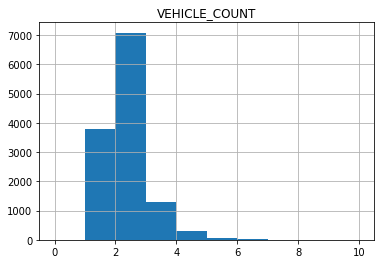

In [49]:
import matplotlib.pyplot as plt
df.hist(column="VEHICLE_COUNT",bins=10)

So one-car accidents are about half as common as two-car accidents, and then crashes with larger vehicle counts seem to drop off rapidly. To examine how they drop off, let's replot the histogram with a logarithmic y-axis:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x105b853c8>]],
      dtype=object)

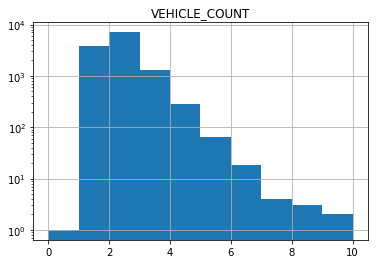

In [50]:
df.hist(column="VEHICLE_COUNT",bins=10,log=True)

The straight line that one could draw between *n* = 2 and *n* = 7 suggests that there's roughly an exponential drop-off in the frequency of *n*-vehicle accidents for *n* > 1. The bulge at the end represents a small number of accidents, but there could be an effect where car crashes in heavier traffic tend to avalanche, leading to more vehicles being sucked into the accident than one would expect based on the overall distribution.

And what about that single crash on the left of the distribution that has a vehicle count of zero? Investigating that is left as an exercise to the reader.

# Using SQL Queries

The WPRDC also provides for your convenience a cumulative table that has records for all Allegheny County vehicle crashes from 2004 through 2017: https://data.wprdc.org/dataset/allegheny-county-crash-data/resource/2c13021f-74a9-4289-a1e5-fe0472c89881


In [27]:
cumulative_resource_id = "2c13021f-74a9-4289-a1e5-fe0472c89881"

While you can download the entire CSV file if you want
    https://data.wprdc.org/dataset/3130f583-9499-472b-bb5a-f63a6ff6059a/resource/ec578660-2d3f-489d-9ba1-af0ebfc3b140/download/all-crashes2004-2017.zip
you can also use SQL queries to get subsets of the crash records or to get the SQL database to do some of the computation for you.

First we define a function to run a SQL query on a given CKAN site:

In [13]:
def query_resource(site,query):
    # Use the datastore_search_sql API endpoint to query a CKAN resource.
    ckan = ckanapi.RemoteCKAN(site)
    response = ckan.action.datastore_search_sql(sql=query)
    # A typical response is a dictionary like this
    #{u'fields': [{u'id': u'_id', u'type': u'int4'},
    #             {u'id': u'_full_text', u'type': u'tsvector'},
    #             {u'id': u'pin', u'type': u'text'},
    #             {u'id': u'number', u'type': u'int4'},
    #             {u'id': u'total_amount', u'type': u'float8'}],
    # u'records': [{u'_full_text': u"'0001b00010000000':1 '11':2 '13585.47':3",
    #               u'_id': 1,
    #               u'number': 11,
    #               u'pin': u'0001B00010000000',
    #               u'total_amount': 13585.47},
    #              {u'_full_text': u"'0001c00058000000':3 '2':2 '7827.64':1",
    #               u'_id': 2,
    #               u'number': 2,
    #               u'pin': u'0001C00058000000',
    #               u'total_amount': 7827.64},
    #              {u'_full_text': u"'0001c01661006700':3 '1':1 '3233.59':2",
    #               u'_id': 3,
    #               u'number': 1,
    #               u'pin': u'0001C01661006700',
    #               u'total_amount': 3233.59}]
    # u'sql': u'SELECT * FROM "d1e80180-5b2e-4dab-8ec3-be621628649e" LIMIT 3'}
    data = response['records']
    return data

Then as a first example, we can write a query to count up 2017 crash records, grouping them by the month that the crash took place in.

In [14]:
crashes_by_month = query_resource(site,
    query='SELECT CAST(\"CRASH_MONTH\" as INT) as month, count(\"_id\") as count FROM "bf8b3c7e-8d60-40df-9134-21606a451c1a" GROUP BY month ORDER BY month')

In [15]:
crashes_by_month

[{'count': '1131', 'month': 1},
 {'count': '948', 'month': 2},
 {'count': '1052', 'month': 3},
 {'count': '931', 'month': 4},
 {'count': '1174', 'month': 5},
 {'count': '1073', 'month': 6},
 {'count': '946', 'month': 7},
 {'count': '969', 'month': 8},
 {'count': '1035', 'month': 9},
 {'count': '1148', 'month': 10},
 {'count': '1014', 'month': 11},
 {'count': '1116', 'month': 12}]

Let's import some libraries so we can make a bar chart of 2017 crashes by month.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")

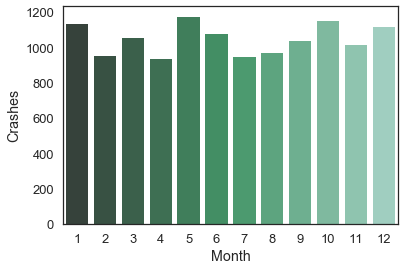

In [26]:
x = np.arange(1, 13)
y = np.array([int(c['count']) for c in crashes_by_month])
by_month = sns.barplot(x, y, palette="BuGn_d")
_,_ = by_month.set_ylabel("Crashes"), by_month.set_xlabel("Month")

Let's tweak the previous query a little, using the year instead of the month and switching the resource ID to that for the cumulative (2004-2017) data.

In [44]:
crashes_by_year = query_resource(site,
                    query='SELECT CAST(\"CRASH_YEAR\" as INT) as year, CAST(count(\"_id\") as INT) as count FROM "{}" GROUP BY year ORDER BY year'.format(cumulative_resource_id))

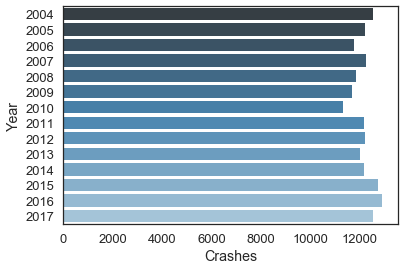

In [45]:
years = np.array([c['year'] for c in crashes_by_year])
y = np.array([c['count'] for c in crashes_by_year])
by_month = sns.barplot(y, years, palette="Blues_d", orient="h") # Since the year labels are long enough to overlap,
_,_ = by_month.set_xlabel("Crashes"), by_month.set_ylabel("Year") # let's switch the x- and y-axes of this plot.


Are there any trends in alcohol-related car crashes?

In [42]:
alcohol_related_crashes_by_year = query_resource(site,
    query='SELECT CAST(\"CRASH_YEAR\" as INT) as year, CAST(count(\"_id\") as INT) as count FROM "{}" WHERE \"ALCOHOL_RELATED\" = 1 GROUP BY year ORDER BY year'.format(cumulative_resource_id))

In [43]:
alcohol_related_crashes_by_year

[{'count': 1133, 'year': 2004},
 {'count': 1137, 'year': 2005},
 {'count': 1256, 'year': 2006},
 {'count': 1274, 'year': 2007},
 {'count': 1231, 'year': 2008},
 {'count': 1134, 'year': 2009},
 {'count': 1058, 'year': 2010},
 {'count': 1094, 'year': 2011},
 {'count': 1141, 'year': 2012},
 {'count': 1115, 'year': 2013},
 {'count': 1109, 'year': 2014},
 {'count': 1048, 'year': 2015},
 {'count': 969, 'year': 2016},
 {'count': 1070, 'year': 2017}]

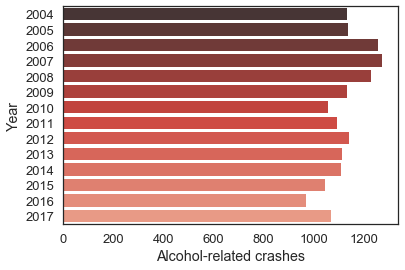

In [46]:
years = np.array([c['year'] for c in alcohol_related_crashes_by_year])
y = np.array([c['count'] for c in alcohol_related_crashes_by_year])
by_month = sns.barplot(y, years, palette="Reds_d", orient="h")
_,_ = by_month.set_xlabel("Alcohol-related crashes"), by_month.set_ylabel("Year")

There might be a decrease in the absolute number of alcohol-related crashes from the 2004-2010 period to the 2011-2017 period, but it's difficult to say. We can try normalizing alcohol-related crashes by year with respect to total crashes per year:

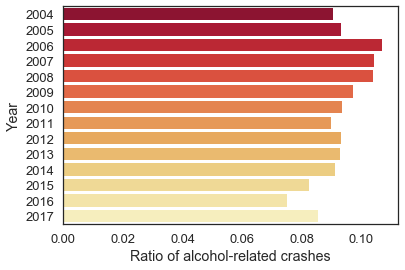

In [59]:
alcohol_related_counts = [a['count'] for a in alcohol_related_crashes_by_year]
all_counts = [c['count'] for c in crashes_by_year]
ratios = [al/c for (al,c) in zip(alcohol_related_counts,all_counts)]

years = np.arange(2004,2018)
y = np.array(ratios)
by_month = sns.barplot(y, years, palette="YlOrRd_r", orient="h")
_,_ = by_month.set_xlabel("Ratio of alcohol-related crashes"), by_month.set_ylabel("Year")

Again, there could be a decreasing trend (with noise on top of it), but this is hardly conclusive.